<a href="https://colab.research.google.com/github/DrStephPowers/BIA/blob/main/Ch10_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U featuretools

## Multi Layer Perceptron (MLP) Classifier

In [ ]:
!pip install palmerpenguins

In [ ]:
from palmerpenguins import load_penguins

In [ ]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
penguins['Adelie'] = penguins['species']
penguins['Adelie'].replace({'Adelie': 1, 'Gentoo': 0, 'Chinstrap': 0}, inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,Adelie
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,1
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,1
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,1
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,1
...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009,0
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009,0
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009,0
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009,0


In [ ]:
penguins = penguins.dropna()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense
import numpy as np

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(penguins[["bill_length_mm", "bill_depth_mm"]],
                                                   penguins[["Adelie"]], test_size=0.2, stratify=penguins[["Adelie"]], shuffle=True)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(32, activation ='relu', input_dim =2))
model.add(Dense(16, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics='accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=200)

Epoch 1/200
9/9 [==============================] - 1s 4ms/step - loss: 0.6669 - accuracy: 0.6880
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.8459
Epoch 3/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5691 - accuracy: 0.8759
Epoch 4/200
9/9 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.9098
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9323
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.4406 - accuracy: 0.9511
Epoch 7/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.9624
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.9699
Epoch 9/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.9774
Epoch 10/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2792 - accuracy: 0.9774
Epoch 11/200
9/9 [===========

In [ ]:
model.evaluate(x_train, y_train)

9/9 [==============================] - 0s 2ms/step - loss: 0.0221 - accuracy: 0.9887


[0.022079547867178917, 0.9887217879295349]

In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.0445 - accuracy: 0.9701


[0.044458337128162384, 0.9701492786407471]

In [ ]:
y_pred = model.predict(x_test)

3/3 [==============================] - 0s 5ms/step


In [ ]:
y_pred

array([[1.27388816e-03],
       [9.65918616e-07],
       [9.99771893e-01],
       [2.11530801e-06],
       [9.99998510e-01],
       [3.10893120e-05],
       [7.42068323e-07],
       [9.99981463e-01],
       [6.79383311e-06],
       [1.40450197e-07],
       [5.67132175e-01],
       [1.24406645e-08],
       [2.17888299e-07],
       [3.17240648e-07],
       [8.49210424e-04],
       [3.89063207e-05],
       [9.99979675e-01],
       [9.99348998e-01],
       [1.10451378e-01],
       [9.99998927e-01],
       [1.39650074e-03],
       [9.85469937e-01],
       [9.99999702e-01],
       [2.11652150e-04],
       [3.63599213e-07],
       [6.86377734e-02],
       [9.93453562e-01],
       [9.92063105e-01],
       [9.99814034e-01],
       [6.07635457e-07],
       [8.29764394e-06],
       [4.05282805e-07],
       [1.41264380e-07],
       [9.99999940e-01],
       [1.28260435e-05],
       [9.99999464e-01],
       [1.25962032e-07],
       [9.99958694e-01],
       [7.59505201e-05],
       [1.13876831e-06],


In [ ]:
labels = []

for i in y_pred:
    if i<0.5:
        label=0
    else:
        label=1
    labels.append(label)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_test, labels)

Text(50.722222222222214, 0.5, 'Actual')

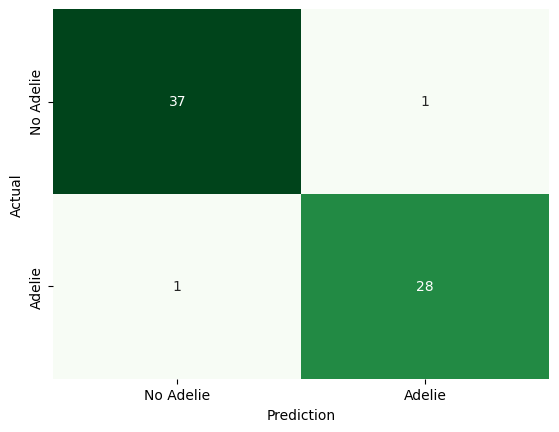

In [ ]:
ax = sns.heatmap(cm, annot=True, xticklabels=['No Adelie', 'Adelie'], yticklabels=['No Adelie', 'Adelie'], cbar=False, cmap="Greens")
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

PRACTICE

Create an MLP Classifier for the Iris Dataset

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris_data = load_iris()
iris_df = pd.DataFrame(data = iris_data['data'], columns = iris_data['feature_names'])

## MLP Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import R2Score
from keras.layers import Dense
import numpy as np
import pandas as pd

In [ ]:
stock = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/fundamentals.csv')

In [ ]:
stock.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [ ]:
stock2 = stock[["Earnings Per Share", "Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]].dropna()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(stock2[["Cash Ratio", "After Tax ROE", "Gross Margin", "Current Ratio"]],
                                                   stock2[["Earnings Per Share"]], test_size=0.2)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
model = Sequential()

In [ ]:
 model.add(Dense(16, input_shape=(4,), kernel_initializer='normal', activation='relu'))
 model.add(Dense(6, kernel_initializer='normal', activation='relu'))
 model.add(Dense(1, kernel_initializer='normal'))

In [ ]:
model.compile(optimizer = 'adam', loss ='mse', metrics= [R2Score()])

In [ ]:
results = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
33/33 [==============================] - 1s 4ms/step - loss: 34.0766 - r2_score: -0.4730
Epoch 2/200
33/33 [==============================] - 0s 12ms/step - loss: 33.6079 - r2_score: -0.4527
Epoch 3/200
33/33 [==============================] - 1s 17ms/step - loss: 32.7088 - r2_score: -0.4139
Epoch 4/200
33/33 [==============================] - 0s 9ms/step - loss: 31.0032 - r2_score: -0.3402
Epoch 5/200
33/33 [==============================] - 0s 6ms/step - loss: 28.4971 - r2_score: -0.2318
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 26.0549 - r2_score: -0.1263
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 24.2314 - r2_score: -0.0474
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 23.5236 - r2_score: -0.0168
Epoch 9/200
33/33 [==============================] - 0s 2ms/step - loss: 23.3298 - r2_score: -0.0085
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss: 23.2487 - r2_sc

In [ ]:
import matplotlib.pyplot as plt

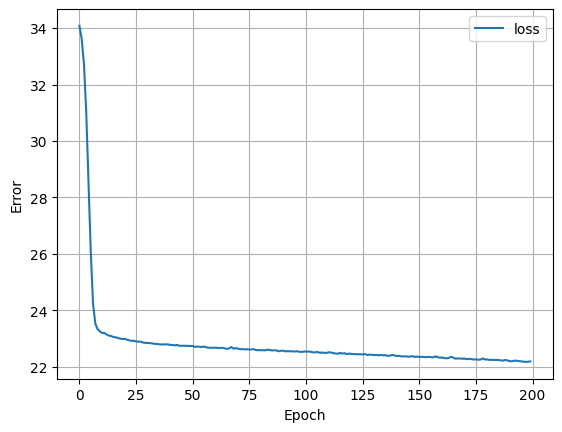

In [ ]:
plt.plot(results.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

In [ ]:
model.evaluate(x_train, y_train)

33/33 [==============================] - 0s 2ms/step - loss: 22.1415 - r2_score: 0.0429


[22.141460418701172, 0.04290801286697388]

In [ ]:
model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 33.1320 - r2_score: 0.0017


[33.132022857666016, 0.0016652941703796387]

In [ ]:
results = model.fit(x_train, y_train, epochs=500)

Epoch 1/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6598 - r2_score: 0.0385
Epoch 2/500
33/33 [==============================] - 0s 3ms/step - loss: 24.6697 - r2_score: 0.0381
Epoch 3/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6460 - r2_score: 0.0391
Epoch 4/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6408 - r2_score: 0.0393
Epoch 5/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6379 - r2_score: 0.0394
Epoch 6/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6343 - r2_score: 0.0395
Epoch 7/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6166 - r2_score: 0.0402
Epoch 8/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6288 - r2_score: 0.0397
Epoch 9/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6198 - r2_score: 0.0401
Epoch 10/500
33/33 [==============================] - 0s 2ms/step - loss: 24.6197 - r2_score: 0.0401

In [ ]:
y_pred = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


PRACTICE

Using the AUTO MPG dataset, predict the Miles Per Gallon (MPG)

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
gas = pd.read_csv(url, names=column_names, na_values='?', comment='\t', sep=' ', skipinitialspace=True)
gas.head()


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


## CNN

### Image

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import R2Score

from keras import layers
from keras.layers import Dense

import numpy as np
import pandas as pd

In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Data Preprocessing

In [ ]:
x = mnist["data"].to_numpy()

In [ ]:
x = x.reshape(len(x), 28, 28)

In [ ]:
y = mnist["target"]

In [ ]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

Data normalization to balance weights. Will create quicker gradient descent. Convert from 8 bit to 32 bit and be more precise about color.

In [ ]:
x_train, x_test = x_train.astype("float32")/255, x_test.astype("float32")/255

In [ ]:
y_train, y_test = y_train.astype("int"), y_test.astype("int")

Expand dimensions to match expectation of the model. Current dimensions are (number of images, 28, 28). Convert to 4 dimensions with last dimension as -1.

In [ ]:
x_train, x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
model = Sequential()

In [ ]:
model.add(layers.Input(shape=(28,28,1)))

model.add(layers.Conv2D(32, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D())
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D())
model.add(layers.BatchNormalization())

model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D())
model.add(layers.BatchNormalization())

model.add(layers.GlobalAvgPool2D())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

Softmax to convert output to a probability that it is one of 10 numbers. Number of filters are powers of 2. Typically 32, 64, 128. Increasing the deeper into the NN. Filter size is (3,3). If images are greater than 128x128 then use (5,5) or (7,7). MaxPool2d and GlobalAvgPool2d downsamples

In [ ]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1257 - accuracy: 0.9623
Epoch 2/5
1875/1875 [==============================] - 65s 34ms/step - loss: 0.0583 - accuracy: 0.9825
Epoch 3/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0450 - accuracy: 0.9857
Epoch 4/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0349 - accuracy: 0.9887
Epoch 5/5
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0289 - accuracy: 0.9906


In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.0553 - accuracy: 0.9836


[0.055298998951911926, 0.9836000204086304]

In [ ]:
pred = model.predict(x_test)
classes_x=np.argmax(pred, axis=1)

313/313 [==============================] - 4s 13ms/step


In [ ]:
pred

array([[1.15765756e-11, 1.02280694e-07, 7.45162515e-06, ...,
        9.99990404e-01, 3.37568025e-07, 1.75634256e-07],
       [5.65584003e-07, 3.67536721e-08, 9.99994695e-01, ...,
        5.67470604e-09, 4.12020640e-08, 2.71516285e-08],
       [1.52761038e-06, 9.99886215e-01, 2.58872547e-06, ...,
        1.87335572e-05, 1.41873525e-05, 1.84064666e-05],
       ...,
       [8.60702354e-09, 1.01795408e-07, 6.14210265e-08, ...,
        5.79059645e-09, 1.37725119e-05, 2.99185075e-07],
       [3.55241214e-09, 3.78060361e-11, 1.09588302e-11, ...,
        2.16995692e-12, 1.55682972e-06, 8.47446469e-09],
       [1.84989499e-08, 2.11365344e-12, 1.39747423e-08, ...,
        1.42302264e-14, 1.99217865e-07, 3.07387471e-09]], dtype=float32)

In [ ]:
classes_x[101]

0

In [ ]:
import matplotlib.pyplot as plt

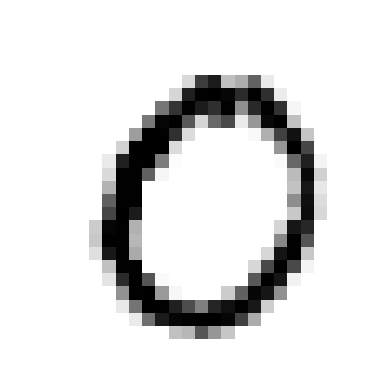

In [ ]:
plt.imshow(x_test[101],cmap="binary")
plt.axis("off")
plt.show()

PRACTICE

Repeat with Fashion data set from https://www.kaggle.com/datasets/zalando-research/fashionmnist

In [ ]:
fash = pd.read_csv("/content/drive/MyDrive/BI BA Handbook/Chapter 9/fashion-mnist_test.csv")

In [ ]:
fash.head()

### More complicated images

Kaggle - https://www.kaggle.com/datasets/imsparsh/flowers-dataset

PRACTICE

Kaggle - Meat freshness https://www.kaggle.com/datasets/vinayakshanawad/meat-freshness-image-dataset

## Sentiment

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from gensim.models.word2vec import Word2Vec

from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import R2Score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras.layers import Conv1D
from keras.layers import MaxPooling1D

import numpy as np
import pandas as pd

Video Games dataset from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Ni, J., J. Li, and J. McAuley (2019). Justifying recommendations using distantly-labeled reviews and fined-grained aspects. Empirical Methods in Natural Language Processing (EMNLP).

In [ ]:
import json

In [ ]:
data = []
for line in open('/content/drive/MyDrive/BI BA Handbook/Chapter 8/Video_Games_5_rev.json', 'r'):
    data.append(json.loads(line))

In [ ]:
vg = pd.json_normalize(data)

In [ ]:
vg.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,...,style.Package Type:,style.Package Quantity:,style.Item Package Quantity:,style.Pattern:,style.Platform for Display:,style.Style Name:,style.Denomination:,style.Offer Type:,style.Configuration:,style.Color Name:
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Preprocess Data

In [ ]:
vg2 = pd.DataFrame(vg[["overall", "reviewText"]]).sample(frac=1)

In [ ]:
vg2 = vg2[:5000]
vg2

,overall,reviewText
131223,5.0,This game set is well worth its pay: I actuall...
289909,4.0,"Nice fun, but not the ps4 tour de force I was ..."
254064,5.0,My daughter really liked this game when she st...
220670,5.0,Llego el articulo
334560,5.0,Excellent game. I stopped after 30 or 40 hour...
...,...,...
473236,5.0,Great game for kids
113662,5.0,After having played the Rockband Guitar/Bass &...
83666,3.0,While Final Fantasy XIII does do some good thi...
67871,5.0,Just got this game a few days ago. It was an e...


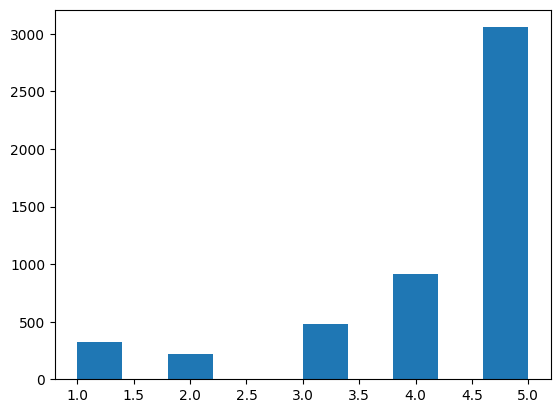

In [ ]:
plt.hist(vg2["overall"])
plt.show()

In [ ]:
vg2["pos"] = vg2["overall"]
vg2["pos"].replace({1: 0, 2:0, 3:np.nan, 4:1, 5:1}, inplace=True)
vg2 = vg2.dropna()

In [ ]:
vg2["neg"] = vg2["overall"]
vg2["neg"].replace({1: 1, 2:1, 3:np.nan, 4:0, 5:0}, inplace=True)
vg2 = vg2.dropna()

In [ ]:
vg2.head()

,overall,reviewText,pos,neg
131223,5.0,This game set is well worth its pay: I actuall...,1.0,0.0
289909,4.0,"Nice fun, but not the ps4 tour de force I was ...",1.0,0.0
254064,5.0,My daughter really liked this game when she st...,1.0,0.0
220670,5.0,Llego el articulo,1.0,0.0
334560,5.0,Excellent game. I stopped after 30 or 40 hour...,1.0,0.0


In [ ]:
reviews = vg2["reviewText"].to_list()

In [ ]:
import re

In [ ]:
def clean_text(text):
    text = re.sub('\xa0', ' ', text)
    text = re.sub('\n•', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\ue080', ' ', text)
    text = re.sub('\x0c', ' ', text)
    html = re.compile('[<,#*?>]')
    text = html.sub(r' ',text)
    url = re.compile('https?://\S+|www\.S+')
    text = url.sub(r' ',text)
    email = re.compile('[A-Za-z0-2]+@[\w]+.[\w]+')
    text = email.sub(r' ',text)
    return text

In [ ]:
for i in range(len(reviews)):
  reviews[i] = clean_text(reviews[i])

In [ ]:
vg2["clean_text"]= reviews

In [ ]:
vg2.head()

,overall,reviewText,pos,neg,tokens,clean_text
131223,5.0,This game set is well worth its pay: I actuall...,1.0,0.0,"[game, set, well, worth, pay, actually, could,...",This game set is well worth its pay: I actuall...
289909,4.0,"Nice fun, but not the ps4 tour de force I was ...",1.0,0.0,"[nice, fun, ps4, tour, de, force, hoping, buy,...",Nice fun but not the ps4 tour de force I was ...
254064,5.0,My daughter really liked this game when she st...,1.0,0.0,"[daughter, really, liked, game, started, playi...",My daughter really liked this game when she st...
220670,5.0,Llego el articulo,1.0,0.0,"[llego, el, articulo]",Llego el articulo
334560,5.0,Excellent game. I stopped after 30 or 40 hour...,1.0,0.0,"[excellent, game, stopped, hour, could, easily...",Excellent game. I stopped after 30 or 40 hour...


Tokenization

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [ ]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download("wordnet")
nltk.download("words")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
def token_creator(clean_text):

    tokens = word_tokenize(clean_text)

    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    cleaned_tokens = [token for token in lemmatized_tokens
                  if not token.isdigit() and not token in string.punctuation]

    lowercase_tokens = [token.lower() for token in cleaned_tokens]

    return lowercase_tokens

In [ ]:
token_rev = []

for i in reviews:
    lowercase_tokens = token_creator(i)
    token_rev.append(lowercase_tokens)

In [ ]:
vg2["tokens"]= token_rev

In [ ]:
vg2.head()

,overall,reviewText,pos,neg,tokens
131223,5.0,This game set is well worth its pay: I actuall...,1.0,0.0,"[game, set, well, worth, pay, actually, could,..."
289909,4.0,"Nice fun, but not the ps4 tour de force I was ...",1.0,0.0,"[nice, fun, ps4, tour, de, force, hoping, buy,..."
254064,5.0,My daughter really liked this game when she st...,1.0,0.0,"[daughter, really, liked, game, started, playi..."
220670,5.0,Llego el articulo,1.0,0.0,"[llego, el, articulo]"
334560,5.0,Excellent game. I stopped after 30 or 40 hour...,1.0,0.0,"[excellent, game, stopped, hour, could, easily..."


Test and Train Split

In [ ]:
train, test = train_test_split(vg2, test_size=0.20)

In [ ]:
all_training_words = [word for tokens in train["tokens"] for word in tokens]

training_sentence_lengths = [len(tokens) for tokens in train["tokens"]]

vocab_train = sorted(list(set(all_training_words)))

In [ ]:
all_test_words = [word for tokens in test["tokens"] for word in tokens]

test_sentence_lengths = [len(tokens) for tokens in test["tokens"]]

vocab_test = sorted(list(set(all_test_words)))

Word2Vec Vocabulary List

In [ ]:
from gensim.models import Word2Vec, KeyedVectors

In [ ]:
from google.colab import files
data_path= "DATAPATH"
!wget -P DATAPATH "/content/drive/MyDrive/BI BA Handbook/Chapter 10/GoogleNews-vectors-negative300.bin.gz"
!gunzip DATAPATH/GoogleNews-vectors-negative300.bin.gz
path_to_model = '/content/drive/MyDrive/BI BA Handbook/Chapter 10/GoogleNews-vectors-negative300.bin'

%time w2v_model = KeyedVectors.load_word2vec_format(path_to_model, binary=True)

/content/drive/MyDrive/BI BA Handbook/Chapter 10/GoogleNews-vectors-negative300.bin.gz: Scheme missing.
gzip: DATAPATH/GoogleNews-vectors-negative300.bin.gz: No such file or directory
CPU times: user 38 s, sys: 7.37 s, total: 45.3 s
Wall time: 1min 17s


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, generate_missing=generate_missing))
    return list(embeddings)

In [ ]:
training_embeddings = get_word2vec_embeddings(w2v_model, train, generate_missing=True)

In [ ]:
max_seq_length = 50
embed_dim = 300

In [ ]:
tokenizer = Tokenizer(num_words=len(vocab_train), lower=True, char_level=False)

tokenizer.fit_on_texts(train["clean_text"].tolist())

training_sequences = tokenizer.texts_to_sequences(train["clean_text"].tolist())

train_word_index = tokenizer.word_index

Padding

In [ ]:
train_cnn = pad_sequences(training_sequences, maxlen=max_seq_length)

In [ ]:
train_embedding_weights = np.zeros((len(train_word_index)+1, embed_dim))

for word,index in train_word_index.items():
    train_embedding_weights[index,:] = w2v_model[word] if word in w2v_model else np.random.rand(embed_dim)

train_embedding_weights.shape

(18895, 300)


In [ ]:
test_sequences = tokenizer.texts_to_sequences(test["clean_text"].tolist())
test_cnn = pad_sequences(test_sequences, maxlen=max_seq_length)

Training Data

In [ ]:
label_names = ['pos', 'neg']

In [ ]:
y_train = train[label_names].values

In [ ]:
x_train = train_cnn

Neural Network

In [ ]:
model = Sequential()

In [ ]:
embedding_layer = Embedding(len(train_word_index)+1, output_dim=embed_dim, weights=[train_embedding_weights], input_length=max_seq_length)

In [ ]:
model.add(embedding_layer)
model.add(Conv1D(32, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(len(list(label_names)),activation='sigmoid'))

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics = ["accuracy"])

In [ ]:
num_epochs = 3
batch_size = 34

In [ ]:
model.fit(x_train, y_train, epochs=num_epochs, validation_split=0.1, shuffle=True, batch_size=batch_size)

Epoch 1/3
96/96 [==============================] - 15s 125ms/step - loss: 0.3755 - accuracy: 0.8830 - val_loss: 0.3505 - val_accuracy: 0.8785
Epoch 2/3
96/96 [==============================] - 12s 122ms/step - loss: 0.2637 - accuracy: 0.8837 - val_loss: 0.3126 - val_accuracy: 0.8785
Epoch 3/3
96/96 [==============================] - 10s 107ms/step - loss: 0.1754 - accuracy: 0.9089 - val_loss: 0.2987 - val_accuracy: 0.8785


Evaluate Model

In [ ]:
model.evaluate(x_train, y_train)

113/113 [==============================] - 2s 18ms/step - loss: 0.1469 - accuracy: 0.9618


[0.14689745008945465, 0.9617834687232971]

In [ ]:
y_pred = model.predict(test_cnn, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 277ms/step


In [ ]:
y_pred

array([[0.98431695, 0.01163004],
       [0.674609  , 0.3472192 ],
       [0.67749286, 0.34287506],
       ...,
       [0.99126226, 0.00864724],
       [0.9448864 , 0.06658281],
       [0.9950077 , 0.00292911]], dtype=float32)

In [ ]:
labelx = [1, 0]

In [ ]:
label_pred=[]

for i in y_pred:
    label_pred.append(labelx[np.argmax(i)])

In [ ]:
sum(test.pos==label_pred)/len(label_pred)

0.8715393133997785

PRACTICE

Pet Supplies dataset from https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/

Ni, J., J. Li, and J. McAuley (2019). Justifying recommendations using distantly-labeled reviews and fined-grained aspects. Empirical Methods in Natural Language Processing (EMNLP).

In [ ]:
import json

In [ ]:
data = []
for line in open('/content/drive/MyDrive/BI BA Handbook/Chapter 8/Pet_Supplies_5.json', 'r'):
    data.append(json.loads(line))

In [ ]:
pet = pd.json_normalize(data)

## RNN

### Time Series

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
aapl = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/AAPL.csv')

In [ ]:
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,51.072498,52.209999,50.875000,52.119999,50.175861,129772400
1,2019-05-07,51.470001,51.855000,50.207500,50.715000,48.823277,155054800
2,2019-05-08,50.474998,51.334999,50.437500,50.724998,48.832893,105358000
3,2019-05-09,50.099998,50.419998,49.165001,50.180000,48.308228,139634400
4,2019-05-10,49.355000,49.712502,48.192501,49.294998,47.638996,164834800


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.metrics import R2Score

from keras import layers
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import Bidirectional

import numpy as np
import pandas as pd


Preprocessing

In [ ]:
len(aapl)

1259

In [ ]:
train = aapl["Close"][:1000]
test = aapl["Close"][1000:]

In [ ]:
len(test)

259

Preprocess Training Data

In [ ]:
dataset_train = np.reshape(train, (-1,1))
dataset_train.shape

(1000, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train = scaler.fit_transform(dataset_train)

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(50, len(scaled_train)):
    x_train.append(scaled_train[i-50:i, 0])
    y_train.append(scaled_train[i, 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

Preprocess Testing Data

In [ ]:
dataset_test = np.reshape(test, (-1,1))
dataset_test.shape

(259, 1)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test = scaler.fit_transform(dataset_test)

In [ ]:
x_test = []
y_test = []

In [ ]:
for i in range(50, len(scaled_test)):
    x_test.append(scaled_test[i-50:i, 0])
    y_test.append(scaled_test[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

In [ ]:
x_test.shape

(209, 50, 1)

Model

In [ ]:
model = Sequential()

In [ ]:
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss ='mse', metrics= [R2Score()])

In [ ]:
results = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
30/30 [==============================] - 6s 47ms/step - loss: 0.0396 - r2_score: 0.4433
Epoch 2/50
30/30 [==============================] - 2s 75ms/step - loss: 0.0050 - r2_score: 0.9304
Epoch 3/50
30/30 [==============================] - 4s 142ms/step - loss: 0.0027 - r2_score: 0.9619
Epoch 4/50
30/30 [==============================] - 3s 96ms/step - loss: 0.0022 - r2_score: 0.9687
Epoch 5/50
30/30 [==============================] - 3s 108ms/step - loss: 0.0019 - r2_score: 0.9734
Epoch 6/50
30/30 [==============================] - 3s 99ms/step - loss: 0.0018 - r2_score: 0.9740
Epoch 7/50
30/30 [==============================] - 3s 115ms/step - loss: 0.0018 - r2_score: 0.9740
Epoch 8/50
30/30 [==============================] - 4s 136ms/step - loss: 0.0016 - r2_score: 0.9769
Epoch 9/50
30/30 [==============================] - 3s 108ms/step - loss: 0.0016 - r2_score: 0.9773
Epoch 10/50
30/30 [==============================] - 3s 91ms/step - loss: 0.0014 - r2_score: 0.9800
Epoc

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 25)                1275      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.evaluate(x_train, y_train)

30/30 [==============================] - 2s 22ms/step - loss: 5.9118e-04 - r2_score: 0.9917


[0.0005911750486120582, 0.9916890263557434]

In [ ]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 28ms/step - loss: 0.0106 - r2_score: 0.8398


[0.01063673384487629, 0.839847981929779]

In [ ]:
y_pred = model.predict(x_test)

7/7 [==============================] - 1s 26ms/step


In [ ]:
y_pred

array([[0.8340738 ],
       [0.81863856],
       [0.7848351 ],
       [0.74605167],
       [0.7351722 ],
       [0.7509721 ],
       [0.77488893],
       [0.82112783],
       [0.85565627],
       [0.8817428 ],
       [0.88512045],
       [0.8708376 ],
       [0.8572938 ],
       [0.8557592 ],
       [0.86720115],
       [0.8722549 ],
       [0.88884926],
       [0.90728605],
       [0.91619796],
       [0.904623  ],
       [0.8764335 ],
       [0.76423705],
       [0.56478626],
       [0.40852597],
       [0.3245765 ],
       [0.2981942 ],
       [0.30461013],
       [0.3404581 ],
       [0.3679823 ],
       [0.37754175],
       [0.35679287],
       [0.33131436],
       [0.3190005 ],
       [0.32529262],
       [0.36781842],
       [0.3895362 ],
       [0.41106096],
       [0.4398944 ],
       [0.49836925],
       [0.59002   ],
       [0.67414343],
       [0.7403289 ],
       [0.7779228 ],
       [0.7369241 ],
       [0.60861266],
       [0.47469202],
       [0.39939848],
       [0.351

In [ ]:
aapl_pred = scaler.inverse_transform(y_pred)

In [ ]:
len(aapl_pred)

209

In [ ]:
import matplotlib.pyplot as plt

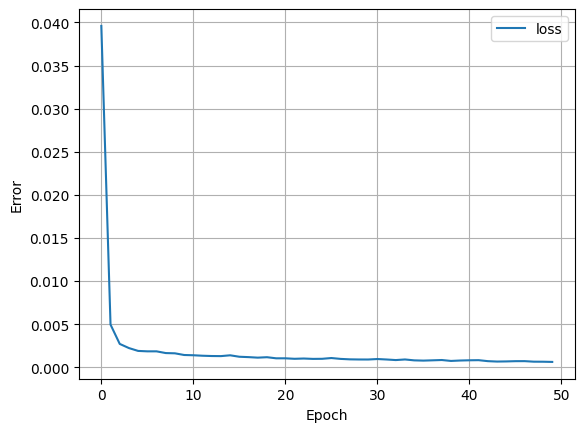

In [ ]:
plt.plot(results.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

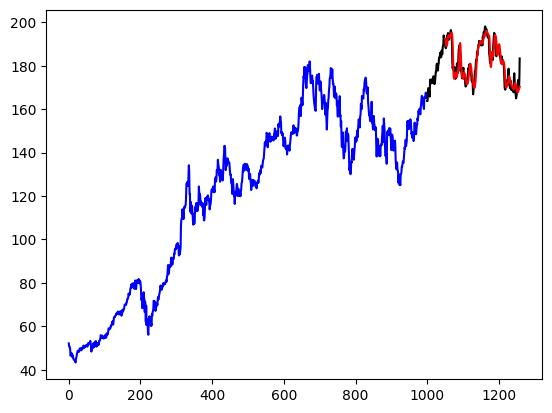

In [ ]:
plt.plot(aapl.index[:1000], train, label = "train_data", color = "b")
plt.plot(aapl.index[1000:], test, label = "train_data", color = "black")
plt.plot(test.index[50:], aapl_pred, label = "prediction", color = "r")
plt.show()

PRACTICE

Meta Data from Yahoo Finance

In [ ]:
meta = pd.read_csv('/content/drive/MyDrive/BI BA Handbook/Chapter 10/META.csv')

In [ ]:
meta.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-05-06,191.240005,194.279999,190.550003,193.880005,193.674515,13994900
1,2019-05-07,192.539993,192.899994,187.850006,189.770004,189.568863,16253000
2,2019-05-08,189.389999,190.720001,188.550003,189.539993,189.339096,12505700
3,2019-05-09,187.199997,189.770004,186.259995,188.649994,188.450043,12967000
4,2019-05-10,188.250000,190.000000,184.589996,188.339996,188.140381,12578500


## Theme